In [1]:
#Improving on Decision Trees
#The main drawback of Decision Trees is that they have a tendency to overfit
#Pruning can improve performance of Decision Trees, yet they are very susceptible to random idiosyncrasies in the training
#dataset
#We say that Decision Trees have high variance as if you randomly change the training dataset, you many end up with a very
#different looking tree
#One of the advantages of decision trees over a model like logistic regression is that they make no assumptions about how the
#data is structured - in logistic regression, we assume that we can draw a line to split the data
#Sometimes our data just isn't structured like that
#A Decision Tree has the potential to get at the essence of the data no matter how it is structured

In [2]:
#Random forest is a model built with multiple trees, and is a way of using Decision Trees to make a better model
#The goal of random forests is to take the advantages of decision trees while mitigating the variance issues
#A random forest is an example of an ensemble because it uses multiple machine learning models to create a single model

In [3]:
#Bootstrapping
#A bootstrapped sample is a random sample of datapoints where we randomly select with replacement datapoints from our original
#dataset of the same size
#This means, in a bootstrapped sample, some datapoints form the original dataset will appear mulitple times and some will not
#appear at all
#For example, if we have four datapoints A, B, C, C, these could be 3 resamples:
#[A, A, B. C], [B, B, B, D], [A, A, C, C]
#The training set is used to generate additional datasets
#We use bootstrapping to mimic creating multiple samples

In [4]:
#Bagging Decision Trees - Bootstrap aggregation (or Bagging) is a technique for reducing the variance in an individual model
#by creating an ensemble from multiple models built on bootstrapped samples
#To bag decision trees, we create multiple (say 10) bootstrapped resamples of our training dataset
#So, if we have 100 datapoints in our training set, each of the resamples will have 100 datapoints randomly chosen from our
#training set
#We create a decision tree with each of these 10 resamples
#To make a prediction, we make a prediction with each of the 10 decisoin trees and then each decision tree gets a vote - the
#prediction with the most votes is the final prediction
#The average of several trees that have different training sets will create a model that more accurately gets at the essence of
#the data
#Bagging Decision Trees is a way of reducing the variance in the model

In [5]:
#Decorrelate the Trees
#With bagged decision trees, the trees may still be too similar to have fully created the ideal model
#So the trees have more variation, we will add some restrictions to the model when building each decision tree -  called as
#decorrelating the trees

In [6]:
#When building a decision tree, at every node, we compare all the split thresholds for each feature to find the single best
#feature and split threshold
#In a decision tree for a random forest, at each node, we randomly select a subset of the features to consider - a standard
#choice for the number of features to consider at each split is the square root of the number of features
#If we bag these decision trees, we get a random forest
#Each decision tree within a random forest is probably worse than a standard decision tree but when we average them we get a
#very strong model

In [7]:
#Breast cancer dataset
#We'll be using the breast cancer dataset - the dataset has measures of different attributes of a lump in breast tissue and a 
#label of whether or not the tumor is cancerous
#The target is a 1d numpy array of 1's and 0's where 0 means malignant and 1 means benign
#The dataset is built in scikit-learn and has 569 datapoints and 30 features

In [8]:
#The code for pulling the data from sklearn
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions:', X.shape)

data dimensions: (569, 30)


In [9]:
#Random forest with scikit-learn
#import the Random Forest model for classification
from sklearn.ensemble import RandomForestClassifier
#Split the dataset into a training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)
#create the RandomForestClassifier object
rf = RandomForestClassifier()
#use fit method to build the model on the training set
rf.fit(X_train, y_train)
#The model can now be used to make prediction - take the first row of the test set which must be 2d to predict
first_row = X_test[0]
print("prediction:", rf.predict([first_row]))
print("true value:", y_test[0])

prediction: [1]
true value: 1


In [10]:
#use the score method to calculate the accuracy over the whole test set
print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 0.972027972027972


In [11]:
#check how this compares to the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("decision tree accuracy:", dt.score(X_test, y_test))

decision tree accuracy: 0.916083916083916


In [12]:
#Tuning a Random Forest
#Random Forest parameters - since a random forest is made up of decision trees, we hava all the same tuning parameters for 
#prepruning as we did for decision trees: max_depth, min_samples_leaf, max_leaf_nodes (with random forests, it is generally
#not important to tune these as overfitting is generally not an issue)
#Two new tuning parameters though - n_estimatores (the number of trees) and max_features (the number of features to consider
#at each split)
#The default for the max features is the square root of p, where p is the number of features (or predictors) - the default is
#is generally a good choice for max features and we usually will not need to change it, but you can set it to a fixed number
#with the following code: rf = RandomForestClassifier(max_features=5)
#The default number of estimators (decision trees) is 10 - this often works well but may in some cases be too small
#You can seit to another number as follows (there is a way to choose the best value for this)
#rf = RandomForestClassifier(n_estimators=15)
#One of the big advantages of Random Forests is that they rarely require much tuning - the default values will work well on
#most datasets

In [13]:
#Grid search
#As explored with Decision Trees, sci-kit learn has built in a Grid Search clas to help us find the optimal choice of
#parameters
#use Grid Search to compare the performance of a Random Forest with different numbers of trees
#define the parameter grid of the parameters we want to vary and give a list of the values to try
#param_grid = {'n_estimators': [10, 25, 50, 75, 100],}
#we can create a Random Forest Classifier and a Grid Search - Grid Search will do k-fold cross validation, set cv=5
#rf = RandomForestClassifier()
#gs = GridSearchCV(rf, param_grid, cv=5)
#use the fit method to run the grid search
#gs.fit(X, y)
#the best parameters will be stored in the best_params_ attribute
#gs.best_params_
#The results may be different each time due to random split

In [14]:
#Accuracy will work fine in this case as the classes in the breast cancer dataset are reasonably balanced
#If the classes are imbalanced, we would want to use an alternative metric like the f1_score
#The code:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

param_grid = {
    'n_estimators': [10, 25, 50, 75, 100]
}

rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)
gs.fit(X, y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


In [15]:
#You can add additional parameters, e.g., max_features, and parameter values to the param_grid dictionary to compare more
#decision trees

In [16]:
#Elbow Graph
#Increasing the number of trees will increase performance until a point where it levels out - the more trees however the more
#complicated the algorithm
#A more complicated algorithm is more resource intensive to use
#Generally it is worth adding complexity to the model if it improves performance but we do not want to unnecessarily add
#complexity
#We can use what is called an Elbow Graph to find the sweet spot
#Elbow Graph is a model that optimizes performance without adding unnecessary complexity

In [17]:
#To find the optimal value, do a Grid Search trying all the values from 1 to 100 for n_estimators
n_estimators = list(range(1, 101))
param_grid = {
    'n_estimators': n_estimators,
}
rf = RandomForestClassifier()
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [18]:
#Instead of just looking at the best params, use the entire result from the grid search - the values are located in the
#cv_results_ attribute (this is a dictionary with a lot of data however we will only need one of the keys: mean_test_score)
#pull out these values and store them as a variable
scores = gs.cv_results_['mean_test_score']
scores

array([0.91391088, 0.91214097, 0.93681105, 0.93847229, 0.95435491,
       0.94553641, 0.94379755, 0.95430834, 0.95437044, 0.94202764,
       0.95960255, 0.95784816, 0.96135693, 0.95433939, 0.95256948,
       0.96134141, 0.96312684, 0.9561093 , 0.95433939, 0.96137246,
       0.95606272, 0.96137246, 0.96312684, 0.95961807, 0.96132588,
       0.95960255, 0.95783263, 0.95256948, 0.95256948, 0.95781711,
       0.96309579, 0.96135693, 0.95961807, 0.9596336 , 0.95607825,
       0.9595715 , 0.96488123, 0.96137246, 0.95958702, 0.96137246,
       0.95609377, 0.96311132, 0.96312684, 0.96488123, 0.96137246,
       0.95607825, 0.95256948, 0.95783263, 0.95960255, 0.96488123,
       0.96488123, 0.95609377, 0.9561093 , 0.9648657 , 0.96137246,
       0.95432386, 0.96311132, 0.95958702, 0.95960255, 0.95960255,
       0.95958702, 0.95960255, 0.96311132, 0.96311132, 0.95961807,
       0.96311132, 0.96311132, 0.95960255, 0.95787921, 0.96135693,
       0.96312684, 0.96135693, 0.96312684, 0.95784816, 0.95780

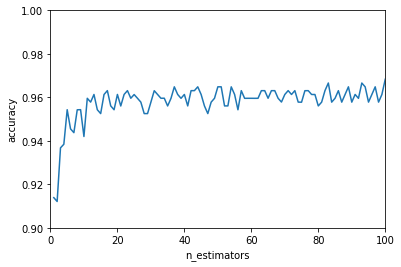

In [19]:
#use matplotlib to graph the results
import matplotlib.pyplot as plt

plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 100)
plt.ylim(0.9, 1)
plt.savefig("plot.png")
plt.show()

In [20]:
#If we look at this graph, we see that around 10 trees the graph levels out
#The best model occurred at n_estimators=33 and n_estimators=64 but given how volatile it is, that was probably due to random
#chance
#We should choose about 10 to be our number of estimators because we want the minimum number of estimators that still yield
#maximum performance

<img src="IMG_20230821_124019.jpg" style="width:400px;height:200px;">

In [21]:
#Now wer can build our Random Forest model with the optimal number of trees
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X, y)
print("random forest accuracy:", rf.score(X_test, y_test))

random forest accuracy: 1.0


In [22]:
#Feature importances
#There are 30 features in the cancer dataset - does every feature contribute equally to building a model? If not, which subset
#of features should we use? This is a matter of feature selection
#Random Forests provide a straightforward method for feature selection - mean decrease impurity
#Random Forests consists of many decision trees, and that for each tree, the node is chosen to split the dataset based on 
#maximum decrease in impurity, typically either Gini impurity or entropy in classification
#For a forest, the impurity decrease from each feature can be averaged - this measure is a metri of importance of each feature
#we then can rank and select the features according to feature importance
#Scikit-learn provides a feature_importances_ variable with the model which shows the relative importance of each feature - the
#scores are scaled down so that the sum of all scores is 1
#Find the feature importances in a random forest, n_estimator=10 using the training dataset, display them in descending order

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

ft_imp = pd.Series(rf.feature_importances_, index=cancer_data.feature_names).sort_values(ascending=False)
ft_imp.head(10)

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64

In [23]:
#In regression, we calculate the feature importance using variance

In [24]:
#New model on selected features
#The reasons to perform feature selection - it enables us to train a model faster; it reduces the complexity of a model thus
#makes it easier to interpret
#If the right subset is chosen, it can improve the accuracy of a model
#Choosing the right subset often relies on domain knowledge, some art, and a bit of luck

In [25]:
#In our dataset, we happen to notice that features with "worst" seem to have higher importances - as a result, we are going to
#build a new model with the selected features and see if it improves accuracy
#the model from the last code
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.965034965034965

In [26]:
#We first find the features whose names include th word "worst"
worst_cols = [col for col in df.columns if 'worst' in col]
worst_cols

['worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [27]:
#create another DataFrame with the selected features, followed by a train test split with the same random state
X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)
#fit the model and output the accuracy
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.972027972027972

In [28]:
#Here we are able to improve the accuracy using a subset of features, a third of the total features - this is because we
#removed some noise and highly correlated features, resulting in an increased accuracy
#The advantage of building a better model using less features will be more pronounced when the sample size is large
#There is no best feature selection method, at least not universally
#Instead, we must discover what works best for the specific problem and leverage the domain expertise to build a good model
#Scikit-learn provides an easy way to discover the feature importances

In [29]:
#Random Forest pros and cons
#The biggest advantage of Random Forests is that they generally perform well without any tuning
#They will also perform decently well on almost every dataset
#A linear model, for example, cannot perform well on a dataset that cannot be split with a line
#It is not possible to split the following dataset with a line without manipulating the features - a random forest will perform
#just fine on this dataset

<img src="IMG_20230821_224323.jpg" style="width:600px;height:300px;">

In [30]:
#We can see this by looking by looking at the following code to generate a toy dataset using the function make_circles
#which makes a classification dataset with concentric circles and compare a Logistic Regression model with a Random Forest model
#We use KFold cross validation to compare the accuracy scores and see that the Logistic Regression model performs worse than
#random guessing but the Random Forest model performs quite well
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

kf = KFold(n_splits=5, shuffle=True, random_state=1)

lr_scores = []
rf_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    
    rf = RandomForestClassifier(n_estimators = 100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))
    
print("LR accuracy:", np.mean(lr_scores))
print("RF accuracy:", np.mean(rf_scores))

LR accuracy: 0.36
RF accuracy: 0.8099999999999999


In [31]:
print(X)
print(y)

[[-0.38289117 -0.09084004]
 [-0.02096229 -0.47787416]
 [-0.39611596 -1.28942694]
 [-0.61813018 -0.06383715]
 [ 0.70347838 -0.18703837]
 [-0.45970463  0.69477465]
 [-0.45091682 -0.71570524]
 [-0.45562004 -0.13406016]
 [-0.26513904  0.40812871]
 [-0.15474648  0.41406973]
 [ 0.231206   -0.53275899]
 [ 0.15623875 -0.8678088 ]
 [ 0.51647541  0.48940995]
 [ 0.68707007 -0.02334129]
 [ 0.54759869 -0.16482373]
 [-0.32179572 -0.80553536]
 [-1.07478639 -0.733362  ]
 [ 0.76758455 -0.43498783]
 [-0.47475234 -0.33813186]
 [ 0.15420656  1.07306032]
 [ 0.65916696  0.20773634]
 [-0.77795003  0.1326555 ]
 [ 0.47025454 -0.31228748]
 [-0.04246799  0.26555446]
 [-0.72405954  0.48807185]
 [-0.36960005 -1.06514028]
 [ 0.17833327 -0.49718972]
 [-0.93927864 -0.41951638]
 [ 0.50914152 -0.70977467]
 [-0.05569852 -0.82162607]
 [-0.11214579  0.72197044]
 [ 0.80463921 -0.15221296]
 [ 0.08261487 -0.11749021]
 [ 0.20349541 -0.37396789]
 [ 0.13864693 -0.23905642]
 [ 0.32785307 -1.00769037]
 [ 0.88944061 -0.39117628]
 

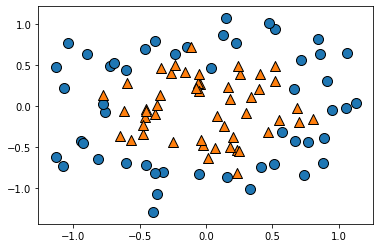

In [32]:
from matplotlib import pyplot as plt
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=100, edgecolors='k')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], s=100, edgecolors='k', marker='^')
plt.savefig("plot.png")
plt.show()

In [33]:
#When looking to get a benchmark for a new classification problem, it is common practice to start by building a Logistic 
#Regression model and a Random Forest model as these two models both have potential to perform well without any tuning
#This will give you values for your metrics to try to beat
#Oftentimes it is almost imppossible to do better than these benchmarks

In [34]:
#Interpretability
#Random Forests despite being made up of Decision Trees are not easy to interpret
#A random forest has several decision trees, each of which is not a very good model but when averaged create an excellent model
#Thus Random Forests are not a good choice when looking for interpretability - in most cases, interpretability is not important

In [35]:
#Computation
#Random Forests can be a little slow to build, especially if you have a lot of trees in the random forest
#Random Forests are not the fastest model, but generally this is not a problem since the computational power of computers is
#a lot